<a href="https://colab.research.google.com/github/aadi2611/911-response-insights/blob/main/911_Calls_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 911 Calls Capstone Project

This project analyzes 911 call data to explore patterns based on time, type of emergency, and geographic location.

## 1. 📁 Dataset Overview

The dataset contains emergency 911 call data for Montgomery County, Pennsylvania. Key columns include:
- `lat`, `lng`: geographic location of the call
- `desc`: description of the emergency
- `zip`: zip code of the incident
- `title`: category and subcategory of the call (e.g., `EMS: BACK PAINS/INJURY`)
- `timeStamp`: date and time of the call
- `twp`: township
- `addr`: address
- `e`: dummy column (all values = 1)

## 2. 🧹 Data Cleaning & Feature Engineering

We extract useful time-related features like `Hour`, `Month`, and `Day of Week` from the `timeStamp` column. We also extract the general category of the emergency (`Reason`) from the `title` field.

## 3. 🔍 Exploratory Data Analysis

We use visualizations to understand the distribution of call types, time-based patterns, and geographic trends.

## 4. 📈 Visualizations & Insights

Here we present graphs showing the frequency of calls by reason, day of week, and hour. A heatmap is also used to display call frequency by hour and day.

## 5. 🌍 Geographic Visualization (Optional)

We can visualize the location of calls on a map using `folium`. This helps identify high-density emergency zones.

## 6. ✅ Conclusion

This analysis reveals the most frequent types of 911 calls, their timing patterns, and potential hot spots by location. This data can inform emergency service allocation and resource planning.

## 7. 🚀 Next Steps

- Build a classifier to predict the emergency type (EMS, Fire, Traffic) based on time and location
- Perform clustering to identify emergency-prone areas
- Add interactivity using Plotly or Dash

# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

____
** Import numpy and pandas **

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans

In [42]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [44]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [45]:
df['zip'].value_counts().head(5)

,count
zip,
19401.0,6979
19464.0,6643
19403.0,4854
19446.0,4748
19406.0,3174


** What are the top 5 townships (twp) for 911 calls? **

In [46]:
df['twp'].value_counts().head(5)

,count
twp,
LOWER MERION,8443
ABINGTON,5977
NORRISTOWN,5890
UPPER MERION,5227
CHELTENHAM,4575


** Take a look at the 'title' column, how many unique title codes are there? **

In [47]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.**

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [48]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [49]:
df['Reason'].value_counts().head()

,count
Reason,
EMS,48877
Traffic,35695
Fire,14920


<ipython-input-50-373967859>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Reason', ylabel='count'>

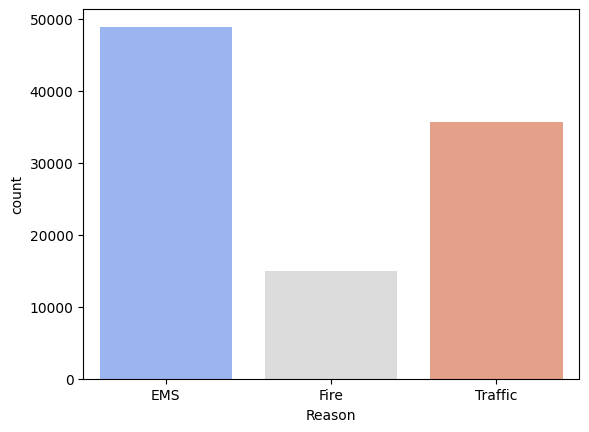

In [50]:
sns.countplot(x = 'Reason',data = df,palette='coolwarm')

In [51]:
type(df['timeStamp'].iloc[0])

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [52]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [53]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [54]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [55]:
df['Day of Week'] = df['Day of Week'].map(dmap)

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

<Axes: xlabel='Day of Week', ylabel='count'>

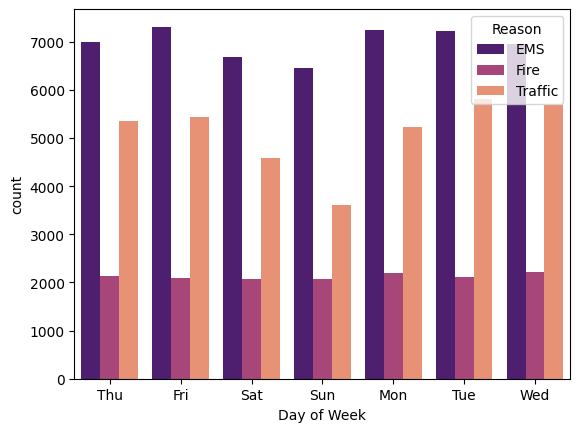

In [56]:
sns.countplot(x='Day of Week',data = df, hue = 'Reason',palette= 'magma')

**Now do the same for Month:**

<Axes: xlabel='Month', ylabel='count'>

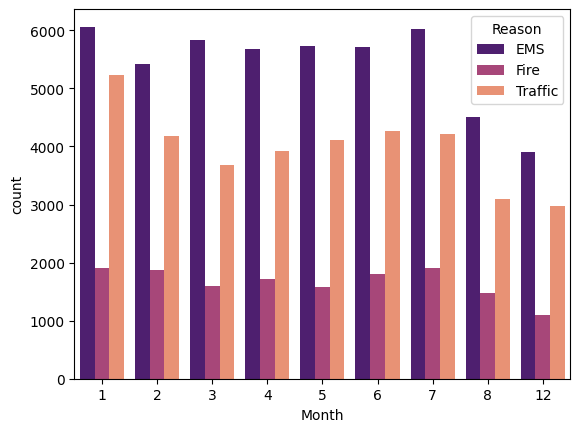

In [57]:
sns.countplot(x='Month',data = df, hue = 'Reason',palette= 'magma')

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [58]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

<Axes: xlabel='Month'>

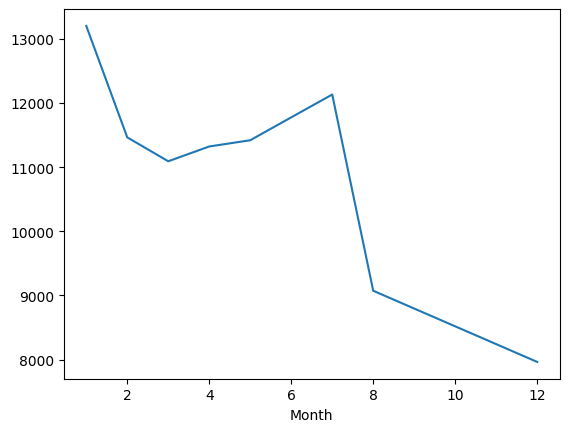

In [59]:
byMonth['twp'].plot()

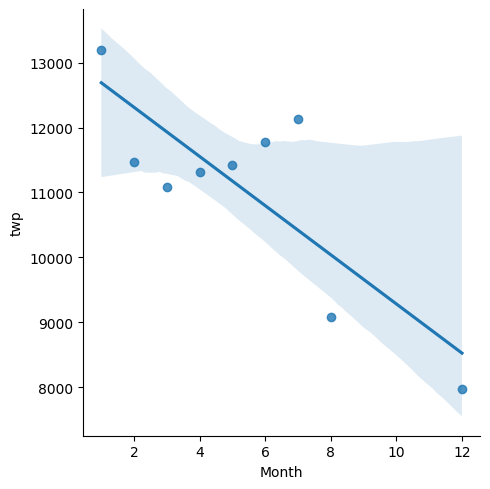

In [60]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [61]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

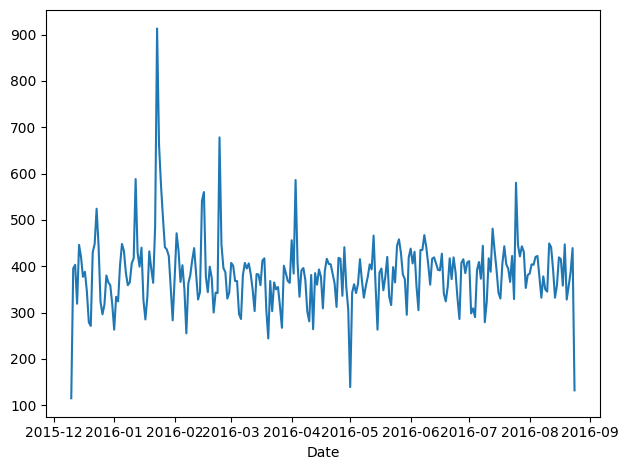

In [62]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

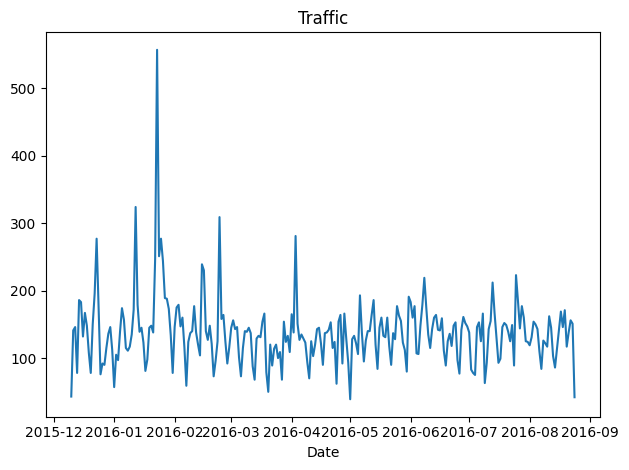

In [63]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

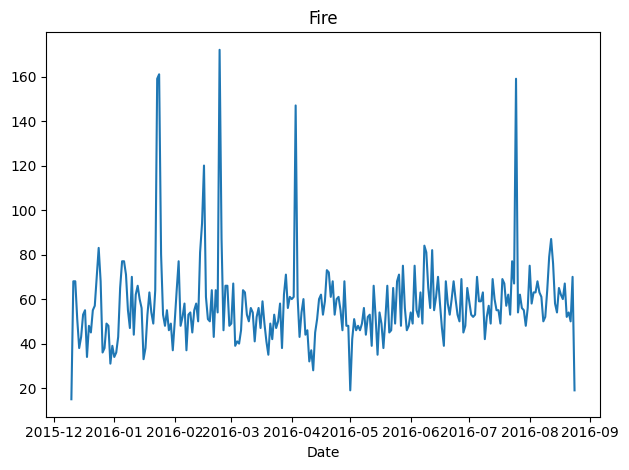

In [64]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

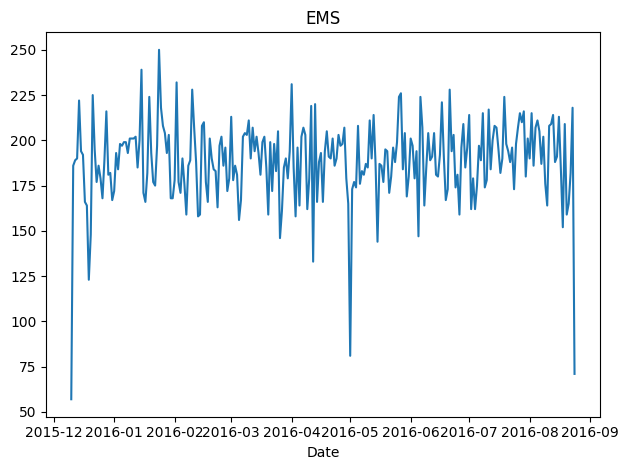

In [65]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [66]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now created a HeatMap using this new DataFrame. **

<Axes: xlabel='Hour', ylabel='Day of Week'>

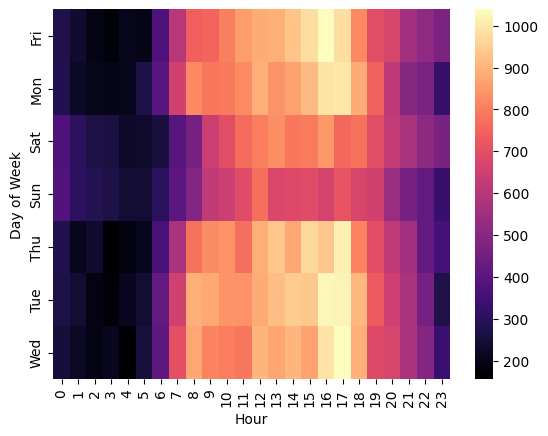

In [67]:
sns.heatmap(dayHour,cmap='magma')

** Now created a clustermap using this DataFrame. **

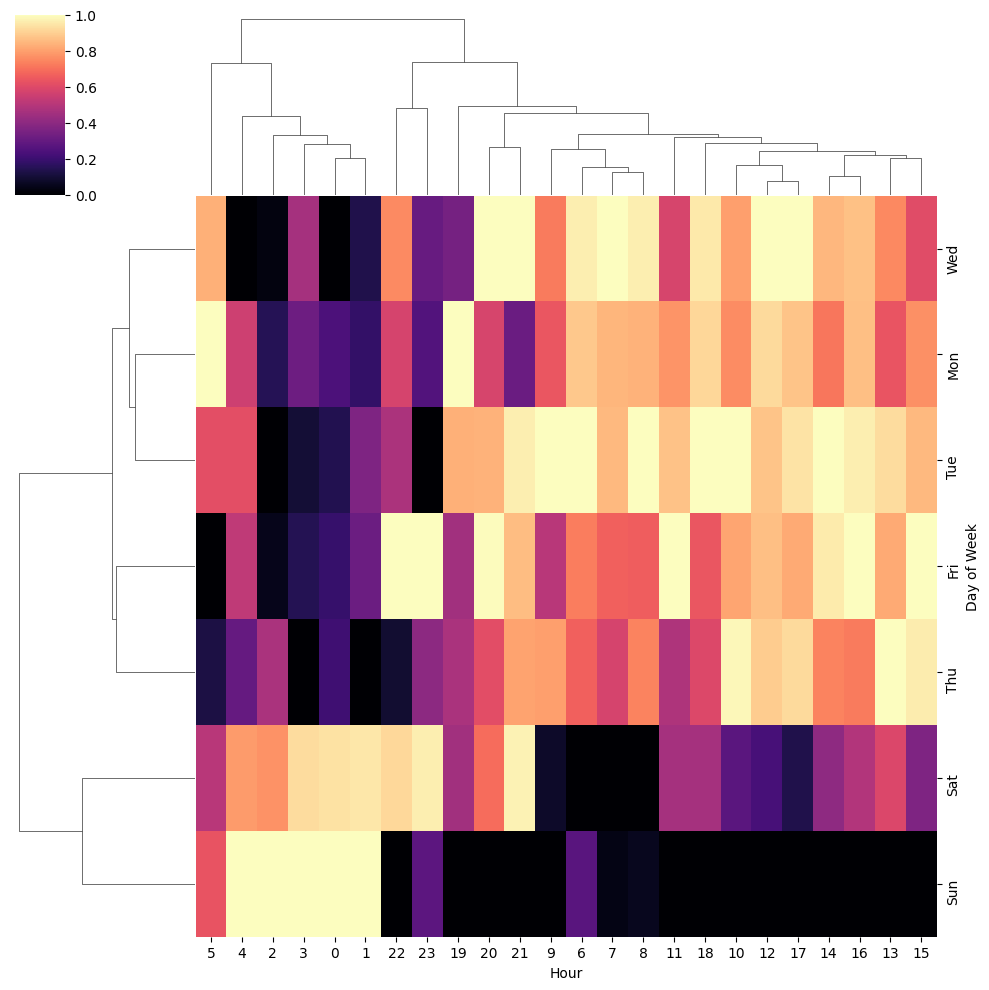

In [68]:
sns.clustermap(dayHour,cmap = 'magma',standard_scale=1)

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [69]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<Axes: xlabel='Month', ylabel='Day of Week'>

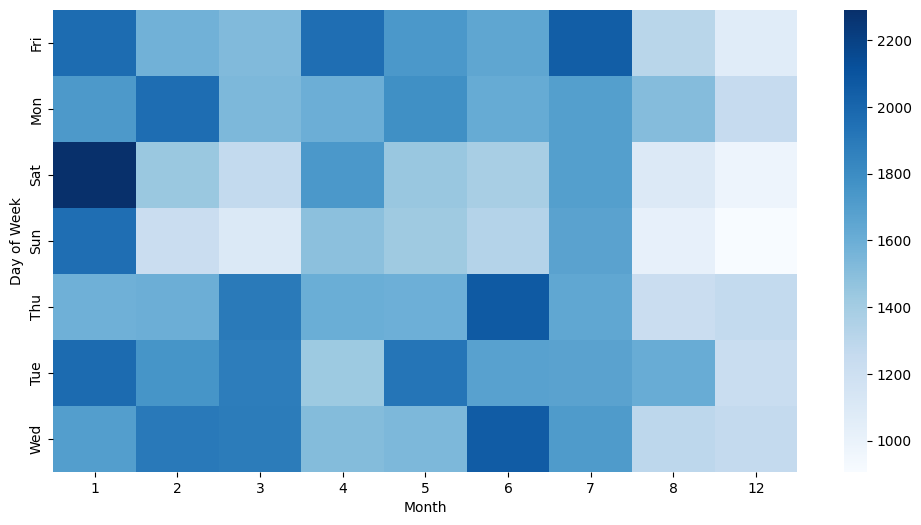

In [70]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='Blues')

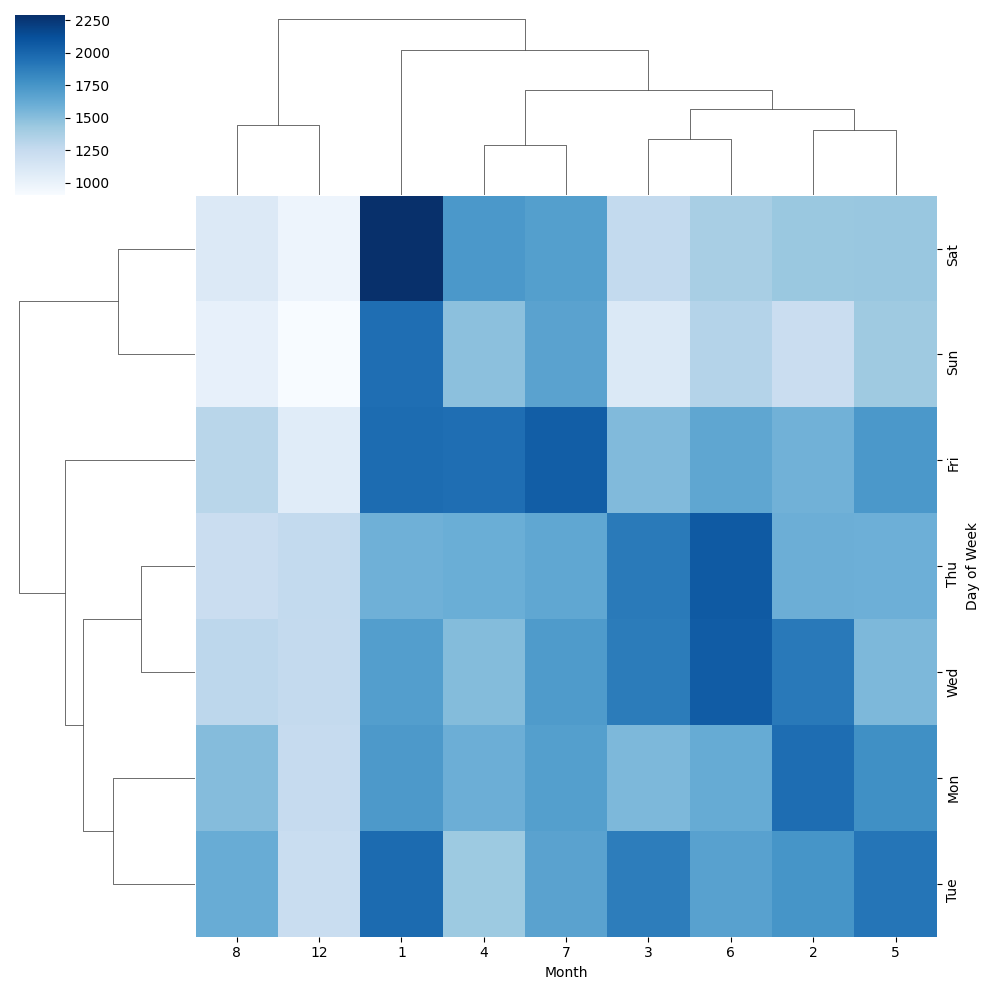

In [71]:
sns.clustermap(dayMonth,cmap='Blues')

# **Clustering Emergency Hotspots**

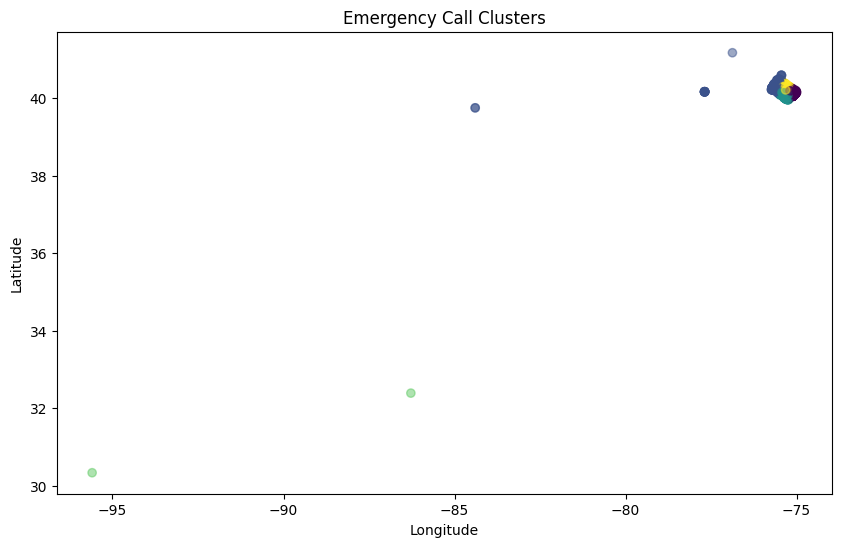

In [72]:
coords = df[['lat', 'lng']].dropna()

kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(coords)

plt.figure(figsize=(10, 6))
plt.scatter(df['lng'], df['lat'], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.title("Emergency Call Clusters")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


# **Interactive Plot with Plotly**

In [73]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
df['Hour'] = df['timeStamp'].dt.hour

fig = px.scatter(df.sample(1000), x='Hour', y='zip', color='Reason', title="Interactive: Emergency Reason by Hour and Zip")
fig.show()
